In [61]:
import folium
import folium.plugins

from matplotlib import pyplot as plt
import pandas as pd
import xml.etree.ElementTree as ET

net_xml = "../seattle-demo/seattle.net.xml"
add_xml = "seattle.add.xml"

#### Transaction investigation

In [ ]:
park_transaction = pd.read_csv("../seattle-demo/seattle_transactions.csv")

In [17]:
park_transaction['Transaction DateTime'] = pd.to_datetime(park_transaction['Transaction DateTime'])

#### temporal distribution

##### Seattle 10/28 - 11/03 (a week)

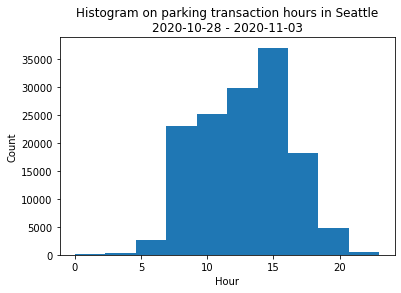

In [46]:
fig, ax = plt.subplots()

park_transaction['Transaction DateTime'].dt.hour.hist(ax=ax, grid=False)
ax.set_xlabel('Hour')
ax.set_ylabel('Count')
ax.set_title('Histogram on parking transaction hours in Seattle\n{} - {}'.format(
    study_area_trans['Transaction DateTime'].dt.date.min(), study_area_trans['Transaction DateTime'].dt.date.max()))

plt.show()

##### Demo area 10/28 - 11/03 (a week)

In [109]:
boundary = [(47.612799, 47.618586), (-122.352507,-122.343548)]

# define by block names and by bounding box
study_area_trans = park_transaction[
    (park_transaction['Blockface Name'].str.contains('1|2|3|4')) & \
    (park_transaction['Blockface Name'].str.contains('CEDAR|VINE|WALL|BATTERY')) &\
    (park_transaction['Latitude'].between(boundary[0][0], boundary[0][1], inclusive=True)) & \
    (park_transaction['Longitude'].between(boundary[1][0], boundary[1][1], inclusive=True)) & \
    (park_transaction['Blockface Name'].str.contains('5|6|ALASKAN|WESTERN|ELLIOT') == False)
]

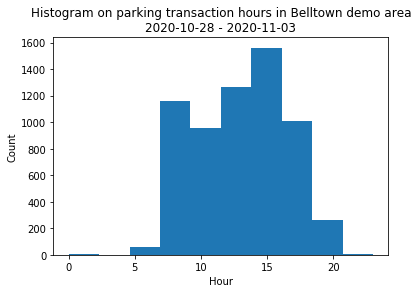

In [110]:
fig, ax = plt.subplots()

study_area_trans['Transaction DateTime'].dt.hour.hist(ax=ax, grid=False)
ax.set_xlabel('Hour')
ax.set_ylabel('Count')
ax.set_title('Histogram on parking transaction hours in Belltown demo area\n{} - {}'.format(
    study_area_trans['Transaction DateTime'].dt.date.min(), study_area_trans['Transaction DateTime'].dt.date.max()))

plt.show()

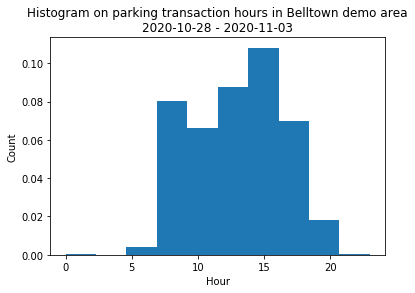

In [111]:
fig, ax = plt.subplots()

study_area_trans['Transaction DateTime'].dt.hour.hist(ax=ax, grid=False, density=1)
ax.set_xlabel('Hour')
ax.set_ylabel('Count')
ax.set_title('Histogram on parking transaction hours in Belltown demo area\n{} - {}'.format(
    study_area_trans['Transaction DateTime'].dt.date.min(), study_area_trans['Transaction DateTime'].dt.date.max()))

plt.show()

#### spatial distribution

In [112]:
study_area_trans

,Transaction ID,Meter Code,Transaction DateTime,Payment Mean,Amount Paid,Duration In Minutes,Blockface Name,Side Of Street,Element key,Parking Space Number,Latitude,Longitude
59,901820472,10052004,2020-10-28 06:12:00,CREDIT CARD,2.00,240,4TH AVE BETWEEN BELL ST AND BATTERY ST,NE,28954,NaN,47.615819,-122.344487
164,901839288,10282004,2020-10-28 07:50:00,CREDIT CARD,0.50,60,VINE ST BETWEEN 1ST AVE AND 2ND AVE,NW,58617,NaN,47.615651,-122.349293
170,901839349,10209004,2020-10-28 07:51:00,CREDIT CARD,2.00,240,2ND AVE BETWEEN WALL ST AND VINE ST,SW,2781,NaN,47.615585,-122.348439
253,901844416,10207004,2020-10-28 08:06:00,PHONE,0.25,30,2ND AVE BETWEEN WALL ST AND VINE ST,NE,2782,NaN,47.615696,-122.348301
261,901844484,10299004,2020-10-28 08:06:00,PHONE,0.62,75,CEDAR ST BETWEEN 2ND AVE AND 3RD AVE,SE,54954,NaN,47.616735,-122.349248
...,...,...,...,...,...,...,...,...,...,...,...,...
141656,904026887,10210004,2020-11-03 19:38:00,PHONE,0.17,20,2ND AVE BETWEEN VINE ST AND CEDAR ST,NE,25718,NaN,47.616245,-122.349211
141667,904027072,10506004,2020-11-03 19:40:00,PHONE,0.17,20,WALL ST BETWEEN 1ST AVE AND 2ND AVE,SE,13346,NaN,47.615003,-122.348237
141676,904027327,10268004,2020-11-03 19:43:00,PHONE,0.14,17,BATTERY ST BETWEEN 2ND AVE AND 3RD AVE,SE,76986,NaN,47.615079,-122.346443
141702,904028217,10122004,2020-11-03 19:51:00,PHONE,0.08,9,1ST AVE BETWEEN WALL ST AND VINE ST,SW,24045,NaN,47.614928,-122.349306


In [123]:
belltown = folium.Map([sum(boundary[0])/2, sum(boundary[1])/2], zoom_start=16, tiles='CartoDB positron')

belltown.add_child(folium.plugins.HeatMap(study_area_trans[['Latitude', 'Longitude']], radius=20, blur=35))

belltown

### generate trips

In [4]:
parking_area = []

root = ET.parse(add_xml).getroot()
for child in root.iter('parkingArea'):
    parking_area.append(child.get('id'))

In [5]:
parking_area

['01-24-NE',
 '01-24-SW',
 '01-25-NE',
 '01-25-SW',
 '01-26-SW',
 '02-24-NE',
 '02-24-SW',
 '02-25-NE',
 '02-25-SW',
 '02-26-NE',
 '02-26-SW',
 '03-24-NE',
 '03-24-SW',
 '03-25-NE',
 '03-25-SW',
 '03-26-SW',
 '04-24-NE',
 '04-24-SW',
 '04-25-NE',
 '04-25-SW',
 '04-26-NE',
 '04-26-SW',
 '24-01-NW',
 '24-01-SE',
 '24-02-NW',
 '24-02-SE',
 '24-03-NW',
 '25-01-NW',
 '25-01-SE',
 '25-02-NW',
 '25-02-SE',
 '25-03-NW',
 '26-01-NW',
 '26-01-SE',
 '26-02-NW',
 '26-02-SE',
 '26-03-NW',
 '26-03-SE',
 '27-01-NW',
 '27-01-SE',
 '27-02-NW',
 '27-02-SE',
 '27-03-NW',
 '27-03-SE']